In [14]:
import pandas as pd
import numpy as np

In [15]:
df=pd.read_csv('data/df_fe.csv', sep=",")
df = df.drop('Date', axis=1)
#df['Date'] = pd.to_datetime(df['Date'])

#df.drop(index=1, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume($),Symbol,Daily Return,SMA_30,SMA_60,...,Close_rolling_std_7,Volume_rolling_mean_7,Volume_rolling_std_7,Close_rolling_mean_30,Close_rolling_std_30,Volume_rolling_mean_30,Volume_rolling_std_30,Year,Month,Day
0,25.764999,25.934999,25.680000,25.825001,22.956745,214256000,AAPL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,9,2
1,25.775000,25.799999,24.645000,24.735001,21.987804,501684000,AAPL,-0.042207,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,9,3
2,24.712500,25.022499,24.447500,24.530001,21.805578,342872000,AAPL,-0.008288,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,9,4
3,24.700001,24.847500,24.577499,24.742500,21.994474,233828000,AAPL,0.008663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,9,5
4,24.825001,24.827499,24.512501,24.590000,21.858906,185426800,AAPL,-0.006163,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72171,118.540001,118.660004,117.580002,117.959999,117.009598,13648100,XOM,-0.004053,119.057667,113.758166,...,0.983953,2.360421e+07,6.875722e+06,119.057667,1.904964,1.929058e+07,5.317631e+06,2024,5,10
72172,118.419998,119.040001,117.120003,117.910004,116.960007,15060600,XOM,-0.000424,119.088333,113.994500,...,1.022789,2.211093e+07,7.498795e+06,119.088333,1.877741,1.933203e+07,5.278192e+06,2024,5,13
72173,116.790001,117.739998,116.480003,117.669998,117.669998,15079100,XOM,-0.002035,119.034667,114.226833,...,0.926081,2.026176e+07,7.393082e+06,119.034667,1.895002,1.917068e+07,5.333308e+06,2024,5,14
72174,117.610001,118.839996,116.080002,118.580002,118.580002,18244300,XOM,0.007734,119.010667,114.490666,...,1.002445,1.838219e+07,5.525655e+06,119.010667,1.896085,1.922868e+07,5.312733e+06,2024,5,15


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72176 entries, 0 to 72175
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open                    72176 non-null  float64
 1   High                    72176 non-null  float64
 2   Low                     72176 non-null  float64
 3   Close                   72176 non-null  float64
 4   Adj Close               72176 non-null  float64
 5   Volume($)               72176 non-null  int64  
 6   Symbol                  72176 non-null  object 
 7   Daily Return            72146 non-null  float64
 8   SMA_30                  71306 non-null  float64
 9   SMA_60                  70406 non-null  float64
 10  SMA_90                  69506 non-null  float64
 11  EMA_30                  72176 non-null  float64
 12  EMA_60                  72176 non-null  float64
 13  EMA_90                  72176 non-null  float64
 14  RSI                     71786 non-null

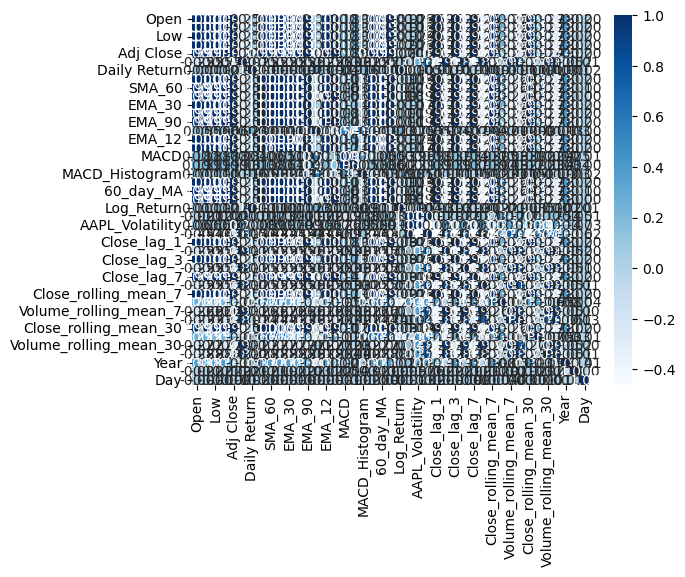

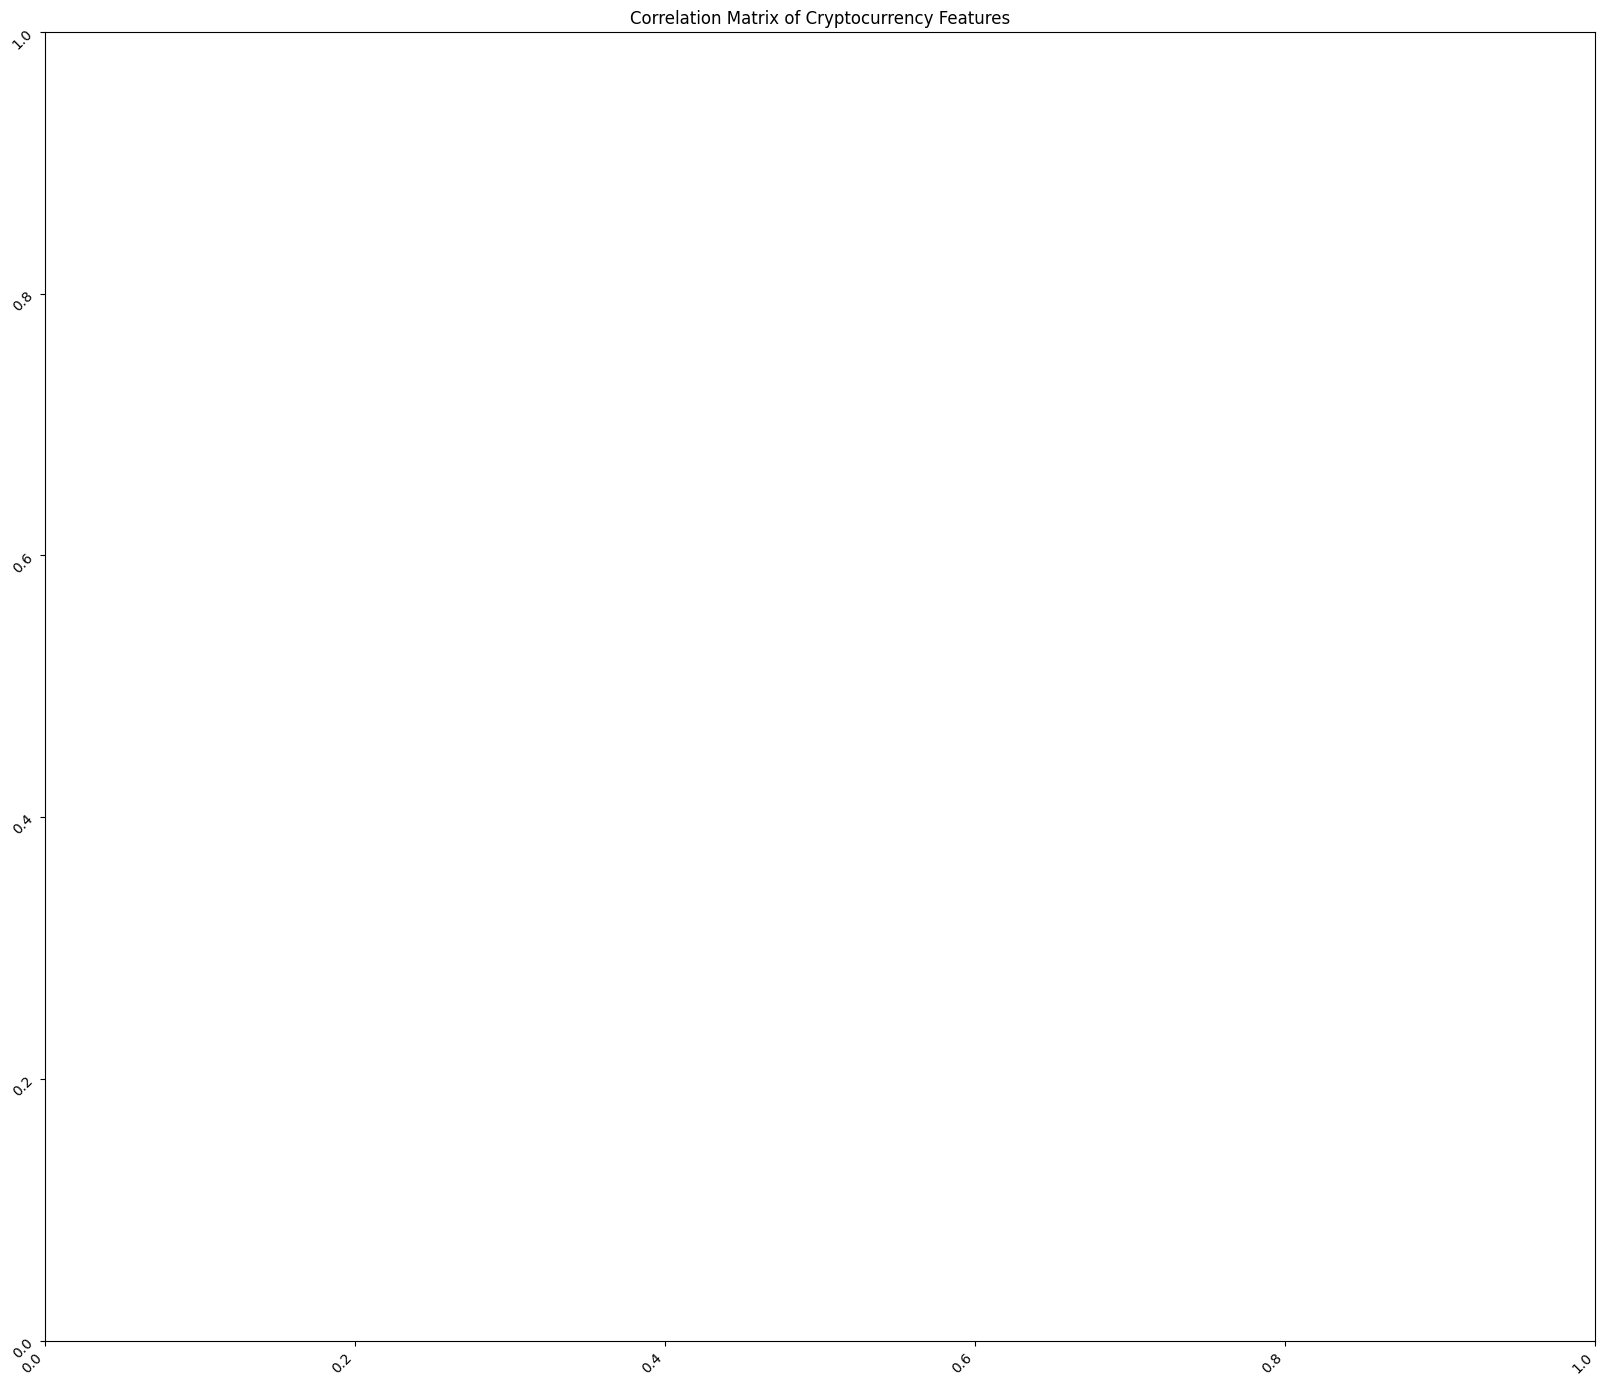

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation analysis
df_numerical = df.select_dtypes(include=['float64', 'int64'])


corr = df_numerical.corr()


sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f")


#### onehotencoding 

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

artists_column = df['Symbol'].values.reshape(-1, 1)

one_hot_encoded_artists = one_hot_encoder.fit_transform(artists_column)

df['Symbol'] = np.argmax(one_hot_encoded_artists, axis=1)

df

,Open,High,Low,Close,Adj Close,Volume($),Symbol,Daily Return,SMA_30,SMA_60,...,Close_rolling_std_7,Volume_rolling_mean_7,Volume_rolling_std_7,Close_rolling_mean_30,Close_rolling_std_30,Volume_rolling_mean_30,Volume_rolling_std_30,Year,Month,Day
0,25.764999,25.934999,25.680000,25.825001,22.956745,214256000,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,9,2
1,25.775000,25.799999,24.645000,24.735001,21.987804,501684000,0,-0.042207,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,9,3
2,24.712500,25.022499,24.447500,24.530001,21.805578,342872000,0,-0.008288,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,9,4
3,24.700001,24.847500,24.577499,24.742500,21.994474,233828000,0,0.008663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,9,5
4,24.825001,24.827499,24.512501,24.590000,21.858906,185426800,0,-0.006163,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72171,118.540001,118.660004,117.580002,117.959999,117.009598,13648100,29,-0.004053,119.057667,113.758166,...,0.983953,2.360421e+07,6.875722e+06,119.057667,1.904964,1.929058e+07,5.317631e+06,2024,5,10
72172,118.419998,119.040001,117.120003,117.910004,116.960007,15060600,29,-0.000424,119.088333,113.994500,...,1.022789,2.211093e+07,7.498795e+06,119.088333,1.877741,1.933203e+07,5.278192e+06,2024,5,13
72173,116.790001,117.739998,116.480003,117.669998,117.669998,15079100,29,-0.002035,119.034667,114.226833,...,0.926081,2.026176e+07,7.393082e+06,119.034667,1.895002,1.917068e+07,5.333308e+06,2024,5,14
72174,117.610001,118.839996,116.080002,118.580002,118.580002,18244300,29,0.007734,119.010667,114.490666,...,1.002445,1.838219e+07,5.525655e+06,119.010667,1.896085,1.922868e+07,5.312733e+06,2024,5,15


#### Feature Importance

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

#df['Date'] = pd.to_datetime(df['Date'])


X = df.drop('Close', axis=1) 
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier if it's a classification task


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [22]:
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(importance_df)


                   Feature    Importance
2                      Low  6.883237e-01
1                     High  3.109495e-01
0                     Open  4.985055e-04
3                Adj Close  9.200613e-05
22              Log_Return  3.825397e-05
6             Daily Return  3.731364e-05
26             Close_lag_1  1.318771e-05
32    Close_rolling_mean_7  3.208380e-06
28             Close_lag_3  2.510606e-06
23      Rolling_Volatility  2.249153e-06
33     Close_rolling_std_7  2.234815e-06
14                  EMA_12  2.021722e-06
18          MACD_Histogram  2.008387e-06
13                     RSI  1.899023e-06
30             Close_lag_7  1.876346e-06
37    Close_rolling_std_30  1.838597e-06
42                     Day  1.832388e-06
4                Volume($)  1.554671e-06
17             Signal_Line  1.514956e-06
35    Volume_rolling_std_7  1.498538e-06
39   Volume_rolling_std_30  1.453401e-06
31            Volume_lag_7  1.416835e-06
27            Volume_lag_1  1.329530e-06
29            Vo

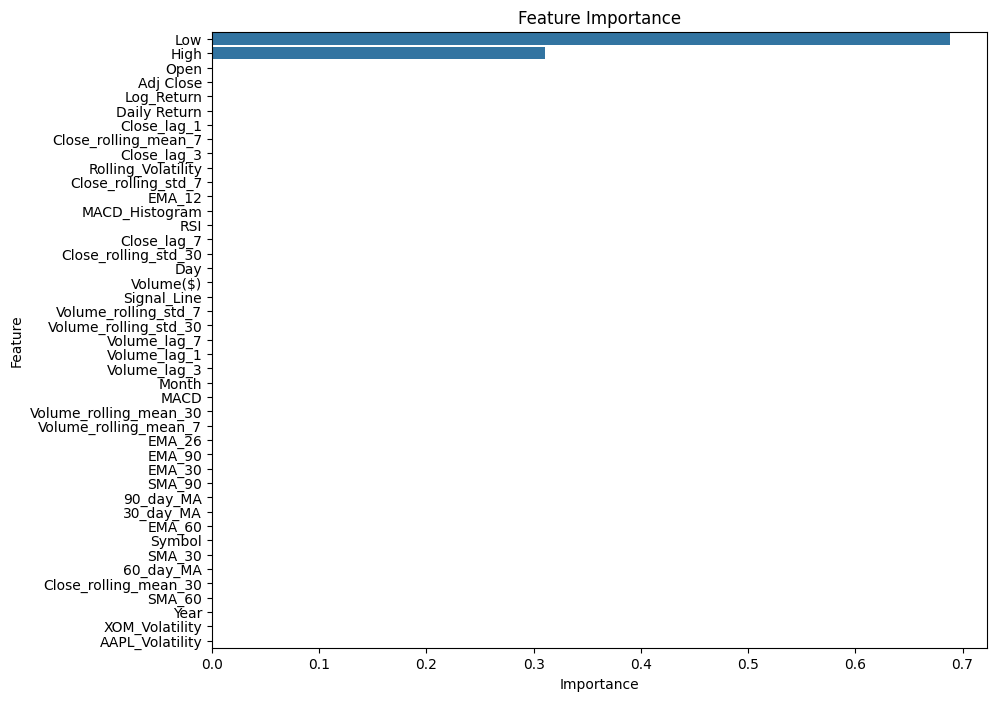

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#### Recursive Feature Elimination (RFE):
RFE is a technique that fits a model and removes the weakest feature (or features) until the specified number of features is reached. 
 

In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(random_state=42)

# Initialize RFE with the estimator and the desired number of features
selector = RFE(estimator, n_features_to_select=10, step=1) 
selector = selector.fit(X_train, y_train)
 
selected_features_mask = selector.support_

feature_ranking = selector.ranking_

# Transform the dataset to the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
 
selected_features = X_train.columns[selected_features_mask]
print(f"Selected features: {selected_features}")

# And to see the ranking of all features
ranking_df = pd.DataFrame({'Feature': X_train.columns, 'Ranking': feature_ranking})
print(ranking_df.sort_values(by='Ranking'))


KeyboardInterrupt: 

#### PCA test

##### reduce redundancy 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA. For example, to keep 95% of variance, set n_components to 0.95
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Interpret the results
print(f"Number of components to explain 95% variance: {pca.n_components_}")
print(f"Explained variance by component: {pca.explained_variance_ratio_}")

# 'X_pca' is the transformed data with reduced dimensions


In [ ]:
X

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming X_train and X_test are your data

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# variance tells you how much information (variance) can be attributed to each principal component
print(pca.explained_variance_ratio_)

In [ ]:
X_train_pca